# KNN com a base boston

Disciplina: Inteligência Artificial <br/>
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
Desenvolvido por: Nayara Thaiza P. Soares <br/>

**Objetivo: Realizar classificação com o algoritmo knn na base boston** <br/>

In [1]:
#imports
import numpy as np  
import pandas as pd  
import random
import math
import operator
#dados
from sklearn import datasets
from sklearn.datasets import load_boston

#plot
import matplotlib.pyplot as plt

boston = load_boston()
#itens da base
boston.keys()

print(boston.DESCR)




.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas

dataset = pandas.DataFrame(boston.data) 
dataset = dataset.astype('float64') # converte para float
dataset.columns = boston.feature_names

dataset.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


**Adaptando a base boston para ser de classificação** <br/>
Como a base boston não é uma base própria para classificação como a iris, escolhi a coluna **RM**, que é a média número de cômodos das casas por bairro para discretizar. <br/>
Para isso, primeiro realizei a verificação do maior número de cômodos, menor e média, entrentanto, ao plotar o gráfico de todos os valores, foi possível perceber que o máximo e o mínimo são pontos de outlier, logo, fiz uma aproximação perto da média.

Max:  8.78
Min:  3.561
Média:  6.284634387351787


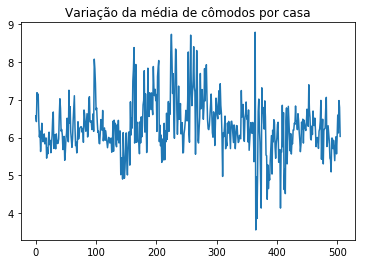

In [3]:
#dataset['RM'] = pandas.to_numeric(dataset['RM'])
#RM é num de comodos medio por casa
print("Max: ", max(dataset['RM']))
print("Min: ", min(dataset['RM']))
soma = sum(dataset['RM'])
print("Média: ", soma/506)

for var in ['RM']:
    x = dataset[var].values  
    plt.plot(x)
    plt.title('Variação da média de cômodos por casa')

plt.show()

**Assim, ficou definido que as casas com média abaixo de 6 cômodos são consideradas casas pequenas (0), as casas com média acima de 6.5 são consideradas casas grandes e entre os dois valores são casas de tamanho medio**<br/>
Esta aproximação buscou equilibrar o numero de dados em cada um dos três grupos.

In [4]:
maior = dataset[dataset['RM'] > 6.5]['RM'].index.tolist()
menor = dataset[dataset['RM'] < 6]['RM'].index.tolist()
med = dataset['RM'][(dataset['RM'].values > 6) & (dataset['RM'].values < 6.5)].index.tolist()


dataset['RM'][menor] = 0  #'CASA_PEQUENA'
dataset['RM'][med] = 1 #'CASA_MEDIA'
dataset['RM'][maior] = 2 #'CASA_GRANDE'


In [5]:
observ = len(boston.data)
carac = len(dataset.columns)
print("Numero de observações (linhas): " + str(observ))
print("Numero de caracteristicas: " + str(carac))
#mostrando a coluna RM modificada com o nosso filtro.
dataset.head(10)

Numero de observações (linhas): 506
Numero de caracteristicas: 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,2.0,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,1.0,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,2.0,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,2.0,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,2.0,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,1.0,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,1.0,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,1.0,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,0.0,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,1.0,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


**Visto que menos caracteristicas fornece um melhor resultado, defini que somente trataria dos dados:** <br/>
**<span style="color:blue">RM</span>: Como já dito é a média de cômodos em casas por bairro** <br/>
**<span style="color:blue">AGE</span>: Idades das casas** <br/>
**<span style="color:blue">DIS</span>: Distância do centro da cidade** <br/>
**<span style="color:blue">LSTAT</span>: Status socioeconomico da população em porcentagem** <br/>
Assim, todas as outras colunas foram removidas do nosso conjunto de dados

In [6]:
dataset = dataset.drop('CRIM',axis=1)
dataset = dataset.drop('ZN',axis=1)
dataset = dataset.drop('INDUS',axis=1)
dataset = dataset.drop('CHAS',axis=1)
dataset = dataset.drop('NOX',axis=1)
dataset = dataset.drop('RAD',axis=1)
dataset = dataset.drop('TAX',axis=1)
dataset = dataset.drop('PTRATIO',axis=1)
dataset = dataset.drop('B',axis=1)


dataset.head(10)

,RM,AGE,DIS,LSTAT
0,2.0,65.2,4.0900,4.98
1,1.0,78.9,4.9671,9.14
2,2.0,61.1,4.9671,4.03
3,2.0,45.8,6.0622,2.94
4,2.0,54.2,6.0622,5.33
5,1.0,58.7,6.0622,5.21
6,1.0,66.6,5.5605,12.43
7,1.0,96.1,5.9505,19.15
8,0.0,100.0,6.0821,29.93
9,1.0,85.9,6.5921,17.10


**Função: split (responsável por dividir a base entre conjunto de teste e conjunto de treinamento)** <br/>
Divide a base de forma aleatória com apoio do num_split como uma aproximação de proporção dos tamanhos.

In [7]:
#transformando em lista
dataset = dataset.values.tolist()

#dividindo a amostra entre conjunto de treinamento e conjunto de teste
def split(trainingSet, testSet, split_num):
    for i in range(len(dataset)):
        if(random.random() < split_num):
            trainingSet.append(dataset[i])
        else:
            testSet.append(dataset[i])
        
    return trainingSet, testSet

trainingSet = []
testSet = []
split_num = 0.67
split(trainingSet, testSet, split_num);
print("Quantidade no conjunto de treinamento: " + str(len(trainingSet)))
print("Quantidade no conjunto de teste: " + str(len(testSet)))

Quantidade no conjunto de treinamento: 338
Quantidade no conjunto de teste: 168


**Funções: dist_euclidiana (calcula a distância euclidiana entre dois vetores), getNeighbors (retorna vizinhos com maiores semelhanças), getResponse (prevê a resposta com base no voto do vizinho), accuracy (analisa a porcentagem de acerto das predições)** <br/><br/>
**dist_euclidiana:** Dados dois vetores como parametros é calculado a distância euclidiana entre eles.<br/>
**getNeighbors:** Responsável por coletar os vizinhos com maiores semelhanças baseado na distância euclidiana, recebe o vetor de treinamento e uma instância do vetor de teste e um k, que é o número de vizinhos retornados. <br/>
**getResponse:** Pega os vizinhos selecionados, e realiza uma votação para predizer qual deve ser a resposta do objeto classificado (no nosso exemplo, o tipo de flor). <br/>
**accuracy:** Recebe como parâmetro o conjunto de teste e o resultado da votação baseada nos vizinhos e verifica a porcentagem de acerto.


In [8]:
# Distância Euclidiana
def dist_euclidiana(v1, v2):
    dim = len(v2)
    soma = 0
    # loop sem pegar a última coluna pq é a saída (dim - 1)
    for i in range(dim - 1):
        soma += math.pow(v1[i] - v2[i], 2)
    return math.sqrt(soma)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = dist_euclidiana(testInstance, trainingSet[x])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][0]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def accuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][0] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

**Chamando as funções e apresentando os resultados**

In [9]:
k = 3
predicoes = []
for x in range(len(testSet)):
    vizinhos=getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(vizinhos)
    predicoes.append(result)
    print('> previsto = ' + repr(result) + ', atual = ' + repr(testSet[x][0]))
accurac = accuracy(testSet, predicoes)
print(" ")
print('Porcentagem de acerto: ' + repr(accurac) + '%')



> previsto = 1.0, atual = 2.0
> previsto = 0.0, atual = 1.0
> previsto = 0.0, atual = 1.0
> previsto = 0.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 1.0, atual = 0.0
> previsto = 1.0, atual = 0.0
> previsto = 0.0, atual = 1.0
> previsto = 0.0, atual = 0.0
> previsto = 2.0, atual = 2.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 2.0, atual = 2.0
> previsto = 2.0, atual = 1.0
> previsto = 2.0, atual = 2.0
> previsto = 2.0, atual = 1.0
> previsto = 1.0, atual = 2.0
> previsto = 1.0, atual = 0.0
> previsto = 1.0, atual = 0.0
> previsto = 0.0, atual = 0.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 1.0, atual = 1.0
> previsto = 0.0, atual = 0.0
> previsto = 1.0, atual = 2.0
> previsto = 1.0, atual = 1.0
> previsto = 0.0, atual = 1.0
> previsto = 2.0, atual = 2.0
> previsto = 1.0, atual = 1.0
> previsto = 2.0, atual = 1.0
> previsto = 0.0, atual = 0.0
> previsto = 1.0, atual = 1.0
> previsto = 2.0, atual = 2.0
> previsto

**Conclusão** <br/>
É possível perceber que, como os conjuntos de teste e treinamento são definidos aleatoriamente, não há como prever a quantidade de vizinhos (k) que dê o melhor resultado. Como a coluna discretizada tem bastante variação dos seus valores (0, 1 e 2), os resultados não ficaram tão bons quando comparados ao da base iris. <br/><br/>

**Referências** <br/>
https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e  <br />
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

